In [1]:
from ucimlrepo import fetch_ucirepo 
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

bike_sharing_dataset = fetch_ucirepo(id=275) 

# Identify the columns and its types in the dataset

In [74]:
X = bike_sharing_dataset.data.features 
y = bike_sharing_dataset.data.targets 

df = pd.DataFrame(X, columns=X.columns)
df['cnt'] = y

print(df.head())

categorical_columns = ['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit']
numerical_columns = ['temp', 'atemp', 'hum', 'windspeed']

for col in categorical_columns:
    print(f'col {col}: {df[col].unique()}')


       dteday  season  yr  mnth  hr  holiday  weekday  workingday  weathersit  \
0  2011-01-01       1   0     1   0        0        6           0           1   
1  2011-01-01       1   0     1   1        0        6           0           1   
2  2011-01-01       1   0     1   2        0        6           0           1   
3  2011-01-01       1   0     1   3        0        6           0           1   
4  2011-01-01       1   0     1   4        0        6           0           1   

   temp   atemp   hum  windspeed  cnt  
0  0.24  0.2879  0.81        0.0   16  
1  0.22  0.2727  0.80        0.0   40  
2  0.22  0.2727  0.80        0.0   32  
3  0.24  0.2879  0.75        0.0   13  
4  0.24  0.2879  0.75        0.0    1  
col season: [1 2 3 4]
col yr: [0 1]
col mnth: [ 1  2  3  4  5  6  7  8  9 10 11 12]
col hr: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
col holiday: [0 1]
col weekday: [6 0 1 2 3 4 5]
col workingday: [0 1]
col weathersit: [1 2 3 4]


# Handle Missing Values

In [16]:
missing_values = df.isnull().sum()
print(missing_values)

dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
dtype: int64


### Analyzing Distribution of Data
Summary Statistics: Calculate mean, median, mode, standard deviation, quartiles, etc., to understand the distribution of numerical variables.
Histograms: Visualize the distribution of numerical variables.
Box Plots: Identify outliers and understand the spread of the data.

In [34]:
numerical_stats_dict = {
    "Variable": [],
    "Mean": [],
    "Median": [],
    "Mode": [],
    "Range": [],
    "Interquartile Range": [],
    "Variance": [],
    "Standard Deviation": [],
    "Skewness": [],
    "Kurtosis": []
}

for num_var in numerical_columns:
    numerical_stats_dict["Variable"].append(num_var)
    numerical_stats_dict["Mean"].append(df[num_var].mean())
    numerical_stats_dict["Median"].append(df[num_var].median())
    numerical_stats_dict["Mode"].append(df[num_var].mode()[0] if not df[num_var].mode().empty else "No mode")
    numerical_stats_dict["Range"].append(df[num_var].max() - df[num_var].min())
    numerical_stats_dict["Interquartile Range"].append(df[num_var].quantile(0.75) - df[num_var].quantile(0.25))
    numerical_stats_dict["Variance"].append(df[num_var].var())
    numerical_stats_dict["Standard Deviation"].append(df[num_var].std())
    numerical_stats_dict["Skewness"].append(df[num_var].skew())
    numerical_stats_dict["Kurtosis"].append(df[num_var].kurt())

stats_df = pd.DataFrame(numerical_stats_dict)

csv_file_path = "../data/numerical_columns_statistics.csv"
stats_df.to_csv(csv_file_path, index=False)

stats_df.head()


Variable      Mean  Median    Mode   Range  Interquartile Range  Variance  \
0       temp  0.496987  0.5000  0.6200  0.9800               0.3200  0.037078   
1      atemp  0.475775  0.4848  0.6212  1.0000               0.2879  0.029532   
2        hum  0.627229  0.6300  0.8800  1.0000               0.3000  0.037222   
3  windspeed  0.190098  0.1940  0.0000  0.8507               0.1492  0.014967   

   Standard Deviation  Skewness  Kurtosis  
0            0.192556 -0.006021 -0.941844  
1            0.171850 -0.090429 -0.845412  
2            0.192930 -0.111287 -0.826117  
3            0.122340  0.574905  0.590820

In [36]:
cat_stats_dict = {
    "Variable": [],
    "Frequency Counts": [],
    "Mode": [],
    "Percentages": []
}

for cat_var in categorical_columns:
    cat_stats_dict["Variable"].append(cat_var)
    freq_counts = df[cat_var].value_counts().to_dict()
    cat_stats_dict["Frequency Counts"].append(freq_counts)
    mode_value = df[cat_var].mode()[0] if not df[cat_var].mode().empty else "No mode"
    cat_stats_dict["Mode"].append(mode_value)
    percentages = (df[cat_var].value_counts(normalize=True) * 100).to_dict()
    cat_stats_dict["Percentages"].append(percentages)

cat_stats_df = pd.DataFrame(cat_stats_dict)

csv_file_path_cat = "../data/categorical_columns_statistics.csv"
cat_stats_df.to_csv(csv_file_path_cat, index=False)

cat_stats_df.head()

Variable                                   Frequency Counts  Mode  \
0   season               {3: 4496, 2: 4409, 1: 4242, 4: 4232}     3   
1       yr                                 {1: 8734, 0: 8645}     1   
2     mnth  {5: 1488, 7: 1488, 12: 1483, 8: 1475, 3: 1473,...     5   
3       hr  {17: 730, 16: 730, 13: 729, 15: 729, 14: 729, ...    16   
4  holiday                                 {0: 16879, 1: 500}     0   

                                         Percentages  
0  {3: 25.870303239541975, 2: 25.369699062086426,...  
1     {1: 50.256056159733006, 0: 49.743943840266994}  
2  {5: 8.562057655791472, 7: 8.562057655791472, 1...  
3  {17: 4.200471833822429, 16: 4.200471833822429,...  
4       {0: 97.1229644973819, 1: 2.8770355026181025}

In [44]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Identifying outliers
outliers = (df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))
print(outliers.any())

dteday        False
season        False
yr            False
mnth          False
hr            False
holiday        True
weekday       False
workingday    False
weathersit     True
temp          False
atemp         False
hum            True
windspeed      True
cnt            True
dtype: bool


In [17]:
import plotly.express as px

fig = px.histogram(df, x='cnt', nbins=50, title='Distribution of Hourly Utilization (cnt)')

fig.show()

From the above analysis, we know which columns has categorical and which ones has numerical values. For each type of information, we can apply appropriate method to see how they affect the bike counts.

### Numerical values

- Apply correlation matrix to see the linear relation between the variable and the target
- We will keep the variables that has high positive or negative correlation with the target and ignore the columns that does not have correlation -> meaning that if the correlation value is near 0, then ignore those columns

### Categorical Values

- We will determine the frequency of categories within categorical variables by visualizing them in bar charts

In [37]:
import plotly.express as px

# Convert 'dteday' to datetime format
df['dteday'] = pd.to_datetime(df['dteday'])

daily_counts = df.groupby(df['dteday'].dt.date)['cnt'].sum().reset_index(name='sum')
monthly_counts = df.groupby(df['dteday'].dt.month)['cnt'].sum().reset_index(name='sum')
hourly_counts = df.groupby('hr')['cnt'].mean().reset_index(name='mean')

# Daily Bike Counts Plot
fig_daily = px.line(daily_counts, x='dteday', y='sum', title='Daily Bike Counts')
fig_daily.update_xaxes(title_text='Date')
fig_daily.update_yaxes(title_text='Total Bike Counts')
fig_daily.show()

# Monthly Bike Counts Plot
fig_monthly = px.bar(monthly_counts, x='dteday', y='sum', title='Monthly Bike Counts')
fig_monthly.update_xaxes(title_text='Month')
fig_monthly.update_yaxes(title_text='Total Bike Counts')
fig_monthly.show()

# Average Hourly Bike Counts Plot
fig_hourly = px.bar(hourly_counts, x='hr', y='mean', title='Average Hourly Bike Counts')
fig_hourly.update_xaxes(title_text='Hour of the Day')
fig_hourly.update_yaxes(title_text='Average Bike Counts')
fig_hourly.show()


In [41]:
import plotly.graph_objects as go

correlation_matrix = df[['temp', 'atemp', 'hum', 'windspeed', 'cnt']].corr()

# Create a heatmap using Plotly graph objects
fig = go.Figure(data=go.Heatmap(
                   z=correlation_matrix.values,
                   x=correlation_matrix.columns,
                   y=correlation_matrix.columns,
                   colorscale='RdBu',  # Using a diverging colorscale ideal for correlation matrices
                   colorbar=dict(title="Correlation Coefficient"),
               ))

fig.update_layout(title_text='Correlation Matrix', title_x=0.5)
fig.show()


In [43]:
import plotly.express as px

# Bike Counts by Season
fig_season = px.box(df, x='season', y='cnt', title='Bike Counts by Season')
fig_season.show()

# Bike Counts by Weather Situation
fig_weathersit = px.box(df, x='weathersit', y='cnt', title='Bike Counts by Weather Situation')
fig_weathersit.show()

# Bike Counts by Month
fig_month = px.box(df, x='mnth', y='cnt', title='Bike Counts by Month')
fig_month.show()

# Bike Counts by Year
fig_year = px.box(df, x='yr', y='cnt', title='Bike Counts by Year')
fig_year.show()

# Bike Counts by Hour of the Day
fig_hour = px.box(df, x='hr', y='cnt', title='Bike Counts by Hour of the Day')
fig_hour.show()


In [45]:
import plotly.express as px

numeric_features = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']
for feature in numeric_features:
    fig = px.box(df, y=feature, title=f'Box Plot of {feature}')
    fig.show()


In [48]:
average_counts = df.groupby('holiday')['cnt'].mean()
print(average_counts)

average_weekday_counts = df.groupby(['holiday', 'weekday'])['cnt'].mean().unstack()
print(average_weekday_counts)

from scipy.stats import ttest_ind

holiday_counts = df[df['holiday'] == 1]['cnt']
non_holiday_counts = df[df['holiday'] == 0]['cnt']

t_stat, p_value = ttest_ind(holiday_counts, non_holiday_counts, equal_var=False)
print(f"T-statistic: {t_stat}, P-value: {p_value}")




holiday
0    190.42858
1    156.87000
Name: cnt, dtype: float64
weekday           0           1           2           3           4  \
holiday                                                               
0        177.468825  186.568332  192.632099  189.981640  198.710277   
1               NaN  166.960784   44.043478  308.458333   81.666667   

weekday           5           6  
holiday                          
0        197.333333  190.209793  
1        135.291667         NaN  
T-statistic: -4.694180230217056, P-value: 3.398387580349194e-06


Average Bike Count on Holidays: 156.87
Average Bike Count on Non-Holidays: 190.4285798921737


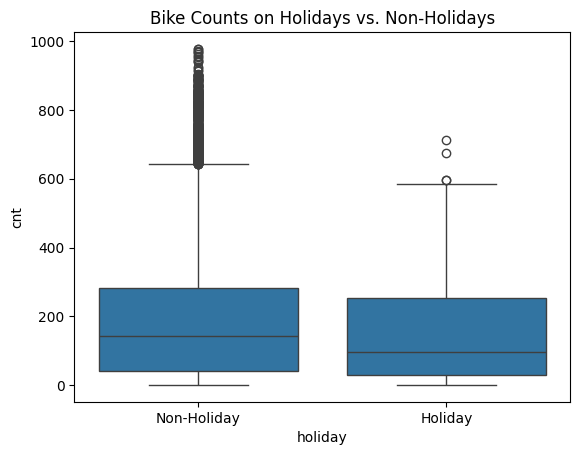

In [50]:
# Calculate average bike counts for holiday and non-holiday days
avg_holiday_count = df[df['holiday'] == 1]['cnt'].mean()
avg_non_holiday_count = df[df['holiday'] == 0]['cnt'].mean()

print(f"Average Bike Count on Holidays: {avg_holiday_count}")
print(f"Average Bike Count on Non-Holidays: {avg_non_holiday_count}")

sns.boxplot(x='holiday', y='cnt', data=df)
plt.title('Bike Counts on Holidays vs. Non-Holidays')
plt.xticks([0, 1], ['Non-Holiday', 'Holiday'])
plt.show()



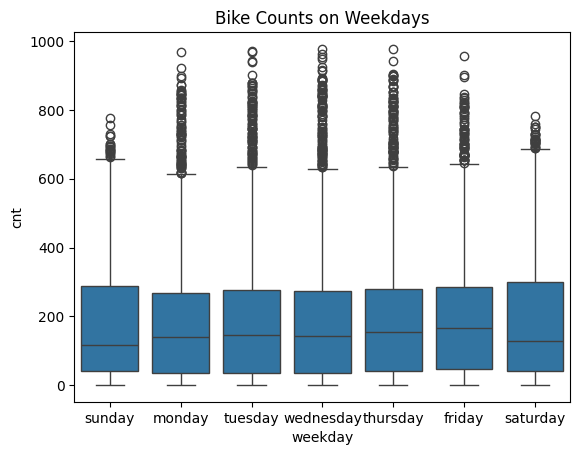

In [80]:
# Calculate average bike counts for weekday

sns.boxplot(x='weekday', y='cnt', data=df)
plt.title('Bike Counts on Weekdays')
plt.xticks([0, 1, 2, 3, 4, 5, 6], ['sunday', 'monday', 'tuesday', 'wednesday', 'thursday', 'friday', 'saturday'])
plt.show()



Average Bike Count on Holidays: 193.20775389801938
Average Bike Count on Non-Holidays: 181.40533188248097


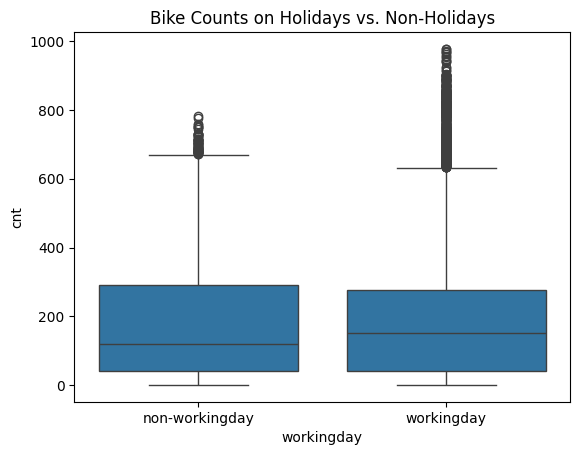

In [53]:
# Calculate average bike counts for holiday and non-holiday days
avg_holiday_count = df[df['workingday'] == 1]['cnt'].mean()
avg_non_holiday_count = df[df['workingday'] == 0]['cnt'].mean()

print(f"Average Bike Count on Holidays: {avg_holiday_count}")
print(f"Average Bike Count on Non-Holidays: {avg_non_holiday_count}")

sns.boxplot(x='workingday', y='cnt', data=df)
plt.title('Bike Counts on Holidays vs. Non-Holidays')
plt.xticks([0, 1], ['non-workingday', 'workingday'])
plt.show()



In [78]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

scaler = StandardScaler()
columns_to_scale = ['temp', 'atemp', 'hum', 'windspeed']

print(df.head())

X_droped = df.drop(['dteday', 'cnt'], axis=1)

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), columns_to_scale)
    ],
    remainder='passthrough'  
)

# Fit and transform the data
X_scaled = preprocessor.fit_transform(X_droped)

#X_scaled = scaler.fit_transform(X_droped)
#X_scaled = scaler.fit_transform(X_droped['temp', 'atemp', 'hum', 'windspeed'])

pca = PCA().fit(X_scaled)

cumulative_variance = pca.explained_variance_ratio_.cumsum()

fig = go.Figure()

fig.add_trace(go.Scatter(x=list(range(1, len(cumulative_variance) + 1)), y=cumulative_variance, mode='lines+markers',
                         name='Cumulative Explained Variance'))

fig.update_layout(title='Cumulative Explained Variance by PCA Components',
                  xaxis_title='Number of Components',
                  yaxis_title='Cumulative Explained Variance',
                  yaxis=dict(tickformat=".0%"),  # Format y-axis as percentages
                  showlegend=True)

fig.show()



                         dteday  season  yr  mnth  hr  holiday  weekday  \
datetime                                                                  
2011-01-01 00:00:00  2011-01-01       1   0     1   0        0        6   
2011-01-01 01:00:00  2011-01-01       1   0     1   1        0        6   
2011-01-01 02:00:00  2011-01-01       1   0     1   2        0        6   
2011-01-01 03:00:00  2011-01-01       1   0     1   3        0        6   
2011-01-01 04:00:00  2011-01-01       1   0     1   4        0        6   

                     workingday  weathersit  temp   atemp   hum  windspeed  \
datetime                                                                     
2011-01-01 00:00:00           0           1  0.24  0.2879  0.81        0.0   
2011-01-01 01:00:00           0           1  0.22  0.2727  0.80        0.0   
2011-01-01 02:00:00           0           1  0.22  0.2727  0.80        0.0   
2011-01-01 03:00:00           0           1  0.24  0.2879  0.75        0.0   
2011-0

<Axes: title={'center': '7-Day Rolling Mean of Bike Rentals'}, xlabel='datetime'>

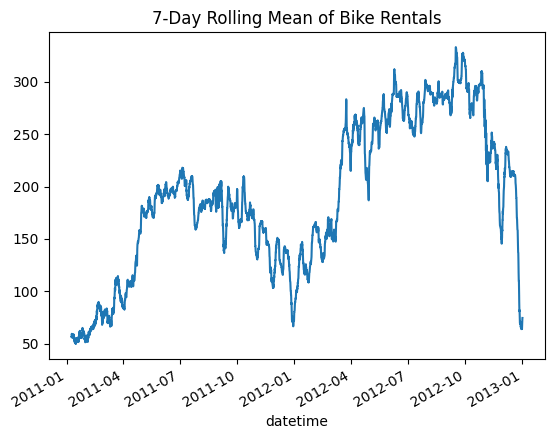

In [76]:
import numpy as np

df['datetime'] = pd.to_datetime(df['dteday']) + pd.to_timedelta(df['hr'], unit='h')
df.set_index('datetime', inplace=True)

df['hr_sin'] = np.sin(df['hr'] * (2. * np.pi / 24))
df['hr_cos'] = np.cos(df['hr'] * (2. * np.pi / 24))
df['mnth_sin'] = np.sin((df['mnth']-1) * (2. * np.pi / 12))
df['mnth_cos'] = np.cos((df['mnth']-1) * (2. * np.pi / 12))
df['weekday_sin'] = np.sin(df['weekday'] * (2. * np.pi / 7))
df['weekday_cos'] = np.cos(df['weekday'] * (2. * np.pi / 7))


df['cnt'].rolling(window=24*7).mean().plot(title='7-Day Rolling Mean of Bike Rentals')


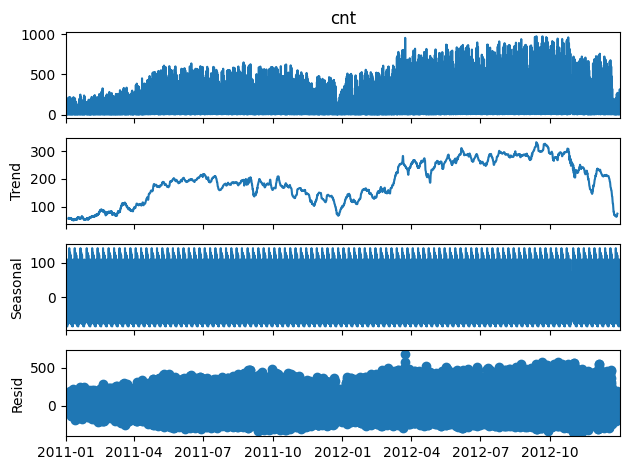

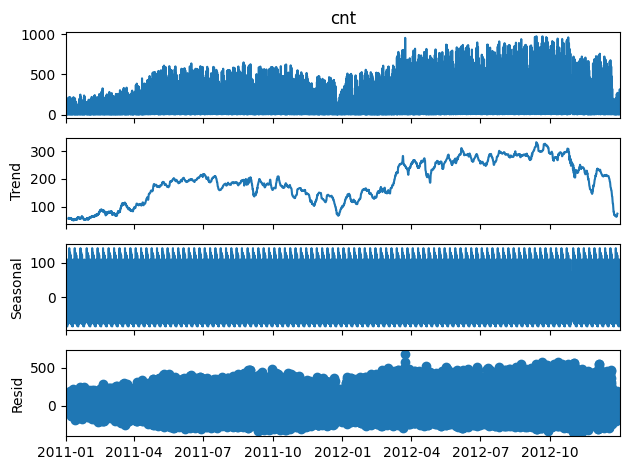

In [65]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(df['cnt'], model='additive', period=24*7)
decomposition.plot()
